In [1]:
import numpy as np

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

In [3]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return (x) * (1 - (x))

def reLU(x):
    return x  *  (x  >  0)

def relu_deriv(x):
    return x > 0

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


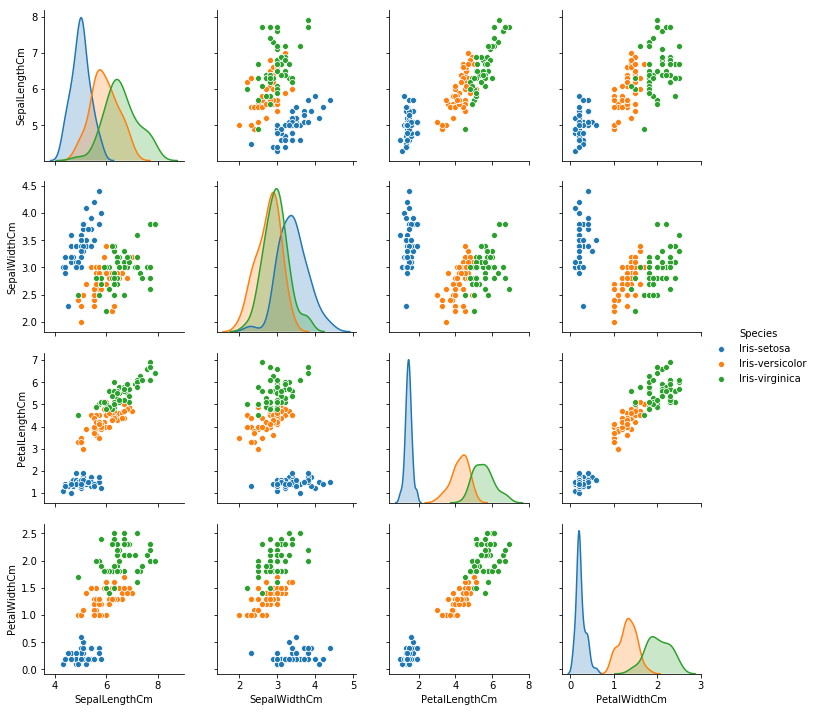

In [5]:
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head())

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show()

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [6]:
def simple_nn(n_neuron = 5, lr = 0.1, n_epoch = 1500):
    
    w0 = 2*np.random.random((4, n_neuron)) - 1
    w1 = 2*np.random.random((n_neuron, 3)) - 1
    
    errors = []

    for i in range(n_epoch):

        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
        w1 += layer1.T.dot(layer2_delta) * lr
        w0 += layer0.T.dot(layer1_delta) * lr
        
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    return errors, accuracy

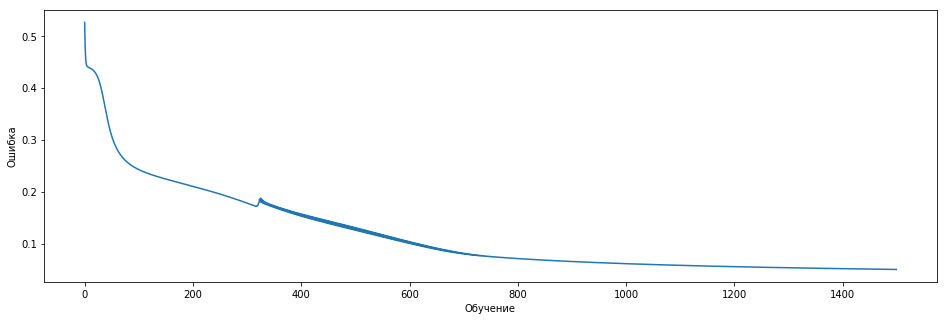

Точность нейронной сети 94.97%


In [7]:
errors, accuracy = simple_nn()

plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [8]:
def simple_nn_ReLU(n_neuron = 5, lr = 0.1, n_epoch = 1500):
    
    w0 = 2*np.random.random((4, n_neuron)) - 1
    w1 = 2*np.random.random((n_neuron, 3)) - 1
    
    errors = []

    for i in range(n_epoch):

        layer0 = X_train
        layer1 = reLU(np.dot(layer0, w0))
        layer2 = reLU(np.dot(layer1, w1))

        layer2_error = y_train - layer2
        layer2_delta = layer2_error * relu_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * relu_deriv(layer1)
    
        w1 += layer1.T.dot(layer2_delta) * lr
        w0 += layer0.T.dot(layer1_delta) * lr
        
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    return errors, accuracy

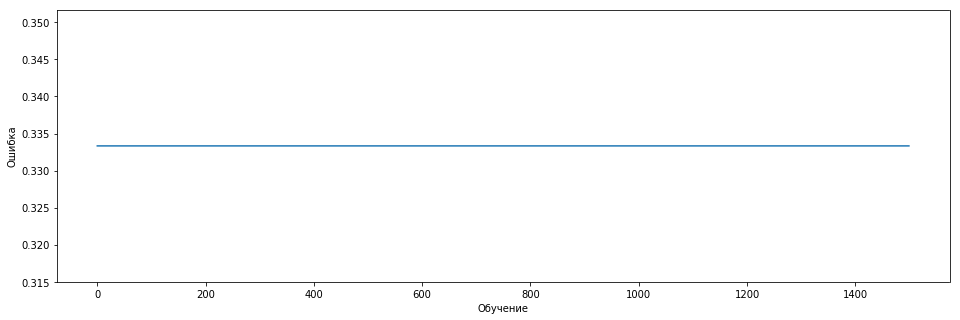

Точность нейронной сети 66.67%


In [9]:
errors, accuracy = simple_nn_ReLU()

plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

### Как видим довольно скоро с обычным ReLU градиент затухает, поэтому имеет смысл использовать Leaky ReLU, чтобы при x<0 f(x) = 0.01x например ###

In [10]:
def simple_nn_multirun(n_neuron = 5, lr = 0.1, n_epoch = 1500, n_runs = 50):
    
    accuracy = []
    
    for run in range(n_runs):
            
        w0 = 2*np.random.random((4, n_neuron)) - 1
        w1 = 2*np.random.random((n_neuron, 3)) - 1

        for i in range(n_epoch):

            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))

            layer2_error = y_train - layer2
            layer2_delta = layer2_error * sigmoid_deriv(layer2)

            layer1_error = layer2_delta.dot(w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)

            w1 += layer1.T.dot(layer2_delta) * lr
            w0 += layer0.T.dot(layer1_delta) * lr
            
        layer0_t = X_test
        layer1_t = sigmoid(np.dot(layer0_t, w0))
        layer2_t = sigmoid(np.dot(layer1_t, w1))
        layer2_error_t = y_test - layer2_t

        error = np.mean(np.abs(layer2_error_t))
        accuracy.append((1 - error) * 100)
    
    return np.mean(accuracy), np.std(accuracy)

In [11]:
n_neurons = [3, 4, 5, 6, 7, 8, 9, 10, 15]
learning_rates = np.linspace(0.1, 1, 10)

results_mean = []
results_std = []

for neurons in n_neurons:
    
    rates_mean = []
    rates_std = []
    
    for lr in learning_rates:
        lr_result_mean, lr_result_std = simple_nn_multirun(n_neuron = neurons, lr = lr, n_epoch = 3000, n_runs = 50)
        rates_mean.append(lr_result_mean)
        rates_std.append(lr_result_std)
        
    print(f'n_neurons:{neurons}, mean:{rates_mean}')        
    results_mean.append(rates_mean)
    results_std.append(rates_std)

n_neurons:3, mean:[96.31733185932258, 96.99179099729017, 97.07886624140515, 97.09245062288026, 97.0417693000617, 97.00429445178666, 96.94607778589, 96.64871865999068, 93.66819762528324, 94.1143792659337]
n_neurons:4, mean:[96.44775796493641, 97.00851346815257, 97.10483400705783, 97.10687364291314, 97.08330029003866, 97.02166768792533, 97.01027138706675, 96.9054330023798, 95.89983630353385, 94.6831954793097]
n_neurons:5, mean:[96.50371384511418, 97.02105574626432, 97.15388767486591, 97.16796723759586, 97.11034420781927, 97.0902389789425, 97.03224496758385, 97.0066784227144, 96.63134673896491, 95.00819282116697]
n_neurons:6, mean:[96.53717079067935, 97.04433712704297, 97.16448784863256, 97.16144952125255, 97.13914724110218, 97.11209538590516, 97.0221952261834, 97.0099235161458, 96.65108858113379, 94.68256804746481]
n_neurons:7, mean:[96.55973486257786, 97.07711175248824, 97.14176598561288, 97.14675114541464, 97.15709348043605, 97.05859448909172, 97.06071100994515, 96.99642867585845, 97.0

In [12]:
results_mean = pd.DataFrame(results_mean, index=n_neurons, columns=[str(x) for x in learning_rates])
results_std = pd.DataFrame(results_std, index=n_neurons, columns=[str(x) for x in learning_rates])

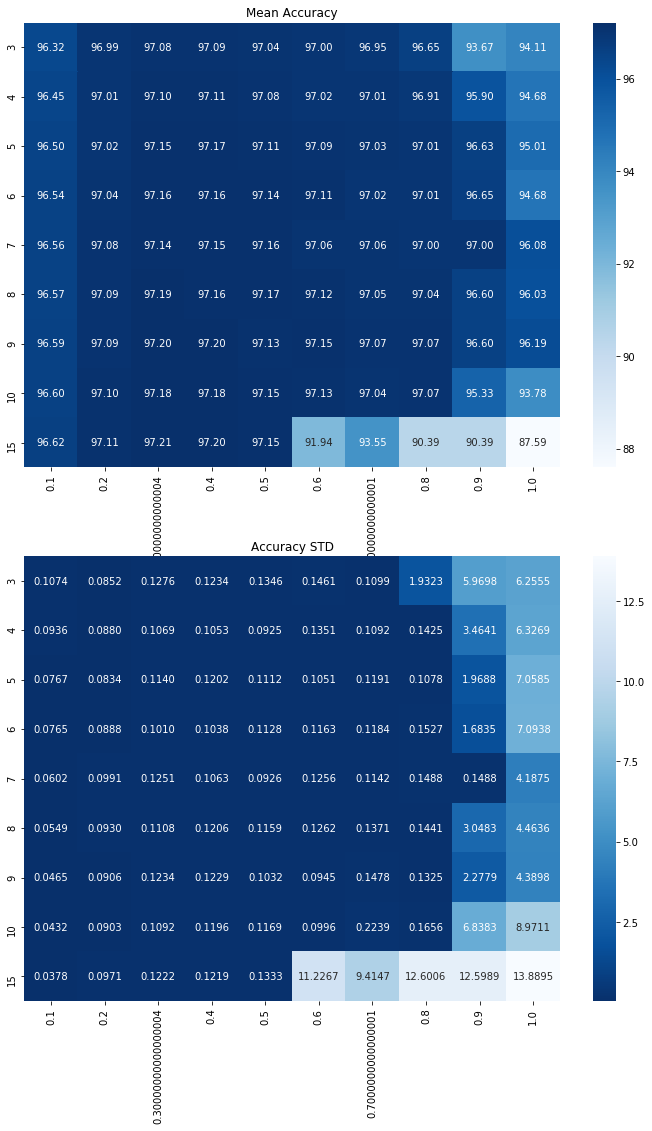

In [13]:
fig = plt.figure(figsize=(12, 18))
ax1 = fig.add_subplot(211)
ax1.set_title('Mean Accuracy')
ax2 = fig.add_subplot(212)
ax2.set_title('Accuracy STD')

sns.heatmap(results_mean, annot=True, cmap='Blues', fmt='.2f', ax=ax1)
sns.heatmap(results_std, annot=True, cmap='Blues_r',fmt='.4f', ax=ax2)

In [14]:
np.max(results_mean, axis=1)

3     97.092451
4     97.106874
5     97.167967
6     97.164488
7     97.157093
8     97.185612
9     97.200678
10    97.183525
15    97.213213
dtype: float64

In [15]:
np.min(results_std, axis=1)

3     0.085235
4     0.088031
5     0.076680
6     0.076463
7     0.060191
8     0.054858
9     0.046511
10    0.043176
15    0.037767
dtype: float64

### Как видим, увеличение скорости обучения ведет к ухудшению решения (особенно в сетях с большим количеством нейронов). Увеличение нейронов в этой задаче тоже ведет к более вариативным решениям (в сетях с 25, 50 и 100 нейронов результаты очень вариативные и плохие по точности). В данных экспериментах мы получили довольно точные и устойчивые решения при скорости обучения от 0.3 до 0.5 и количестве нейронов от 5 до 15. Лучшее по точности решение при 15 нейронах, но это решение имеет чуть более высокое стандартное отклонение. В любом случае мы использовали игрушечную нейронную сеть с одним скрытым слоем, даже без нейрона смещения, хотя и этой "сети" хватило для достаточно точного решения этой задачи. ###